In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
# jupyter화면을 출력
%matplotlib inline 

In [2]:
# 한글처리
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font)

In [3]:
# Pocketmon.csv 데이터 불러오기
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
# 결측치 컬럼 삭제
df.dropna(how='any')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
# 전설포켓몬 타입별 수 바그래프 시각화
s = df[df['Legendary']==True]['Type 1'].value_counts()
d = df[df['Legendary']==True]['Type 2'].value_counts()
df1 = pd.DataFrame([s,d])
df1.index = ['Type 1', 'Type 2']
df1

,Psychic,Dragon,Fire,Rock,Ground,Electric,Water,Steel,Grass,Normal,Ghost,Dark,Flying,Ice,Fairy,Fighting
Type 1,14.0,12.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN
Type 2,5.0,4.0,3.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,13.0,3.0,2.0,4.0


<AxesSubplot:>

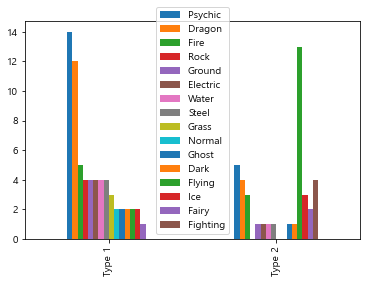

In [8]:
df1.plot(kind='bar')

<AxesSubplot:xlabel='Generation'>

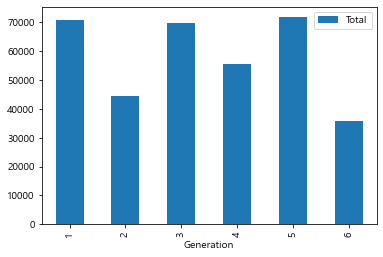

In [9]:
# 세대별 능력치합(Total) 박스플롯
df.groupby('Generation')['Total'].sum()
generation_df = pd.DataFrame(df.groupby('Generation')['Total'].sum())
generation_df.plot(kind='bar')

<AxesSubplot:>

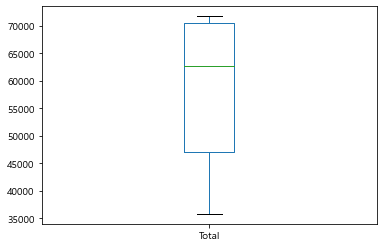

In [10]:
generation_df.plot(kind='box')

In [11]:
### 데이터 전처리
# Legendary 컬럼 int 타입으로 변경
df['Legendary'] = df['Legendary'].astype(int)
df['Generation'] = df['Generation'].astype(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    object
 12  Legendary   800 non-null    int32 
dtypes: int32(1), int64(8), object(4)
memory usage: 78.2+ KB


In [13]:
# #, Name 컬럼 삭제
df.drop(['#','Name'], axis=1, inplace=True)

In [14]:
df_pre =  df[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 
                      'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]


In [15]:
df_pre.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0


In [16]:
# Type 1 원핫인코딩
onehot_type1 = pd.get_dummies(df['Type 1'])
onehot_type1.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# Generation 원핫인코딩
onehot_Generation = pd.get_dummies(df_pre['Generation'])
onehot_Generation.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [18]:
# Type 1 컬럼 삭제
#type 오류가 지속적으로 나서 type2도 드랍
df.drop(['Type 1'], axis=1, inplace=True)
df.drop(['Type 2'], axis=1, inplace=True)

In [19]:
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,0
1,405,60,62,63,80,80,60,1,0
2,525,80,82,83,100,100,80,1,0
3,625,80,100,123,122,120,80,1,0
4,309,39,52,43,60,50,65,1,0


In [20]:
# 스케일링 (StandardScaler)  Total, HP, Attack, Defense, Sp.Atk, Sp.Def, Speed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [21]:
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [22]:
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,1,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,1,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,1,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,1,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,1,0


In [23]:
#  데이터 분할(random_state=33)
from sklearn.model_selection import train_test_split

In [24]:
X = df.loc[:, df.columns != 'Legendary']
y = df['Legendary']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
print(x_train.shape)
print(x_test.shape)

(600, 8)
(200, 8)


In [28]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = model.predict(x_test)

In [30]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.95
Precision : 0.636
Recall : 0.583
F1 : 0.609


In [31]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[184   4]
 [  5   7]]


In [33]:
# 성능 개선
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(k_neighbors=5)
data, target = smote.fit_resample(X, y)
df_smote = pd.concat([data, target], axis=1)
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total       1470 non-null   float64
 1   HP          1470 non-null   float64
 2   Attack      1470 non-null   float64
 3   Defense     1470 non-null   float64
 4   Sp. Atk     1470 non-null   float64
 5   Sp. Def     1470 non-null   float64
 6   Speed       1470 non-null   float64
 7   Generation  1470 non-null   object 
 8   Legendary   1470 non-null   int32  
dtypes: float64(7), int32(1), object(1)
memory usage: 97.7+ KB


In [36]:
df_smote['Legendary'].value_counts()

1    735
0    735
Name: Legendary, dtype: int64

In [37]:
x_train, x_valid, y_train, y_valid = train_test_split(df_smote.drop('Legendary',1), df_smote['Legendary'],
                                                     random_state=33,
                                                     stratify=df_smote['Legendary'])

In [38]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [39]:
pred = model.predict(x_valid)
accuracy_score(y_valid, pred)

0.9565217391304348

In [40]:
confusion_matrix(y_valid, pred)

array([[169,  15],
       [  1, 183]], dtype=int64)